### Importing libraries

In [3613]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import zscore
from scipy.stats import ttest_ind

### Importing data and basic exploration

In [3615]:
df = pd.read_csv('adoptions.csv', sep=';')

In [3616]:
# Checking the number of rows and columns
df.shape

(709, 11)

In [3617]:
# Quick look at the first rows of data
df.head(30)

,Name,Reference Number,Arrival Date,Age when adopted,Weight in kg,Adoption Date,Returned,Date of return,Breed,Gender,Black fur
0,Mimir,425/24,19.03.2024,9,52,01.02.2025,FALSE,NaN,Moscow Watchdog,male,False
1,Tarzan,1284/23,03.09.2023,9,27,08.02.2025,FALSE,NaN,mix-breed,male,True
2,Ulfi,1518/24,28.10.2024,3,19,15.02.2025,FALSE,NaN,mix-breed,male,False
3,Serek,1732/24,18.12.2024,9,8,25.01.2025,FALSE,NaN,Yorkshire Terrier,male,False
4,Thor,1577/24,09.11.2024,2,25,17.01.2025,FALSE,NaN,Amstaff,male,True
5,Amigo,NaN,12.08.2024,2,5,13.12.2024,FALSE,NaN,mix-breed,male,False
6,Serek,1548/24,04.11.2024,9,8,07.12.2024,TRUE,18.12.2024,Yorkshire Terrier,male,False
7,Lorek,871/23,11.06.2023,2,22,25.11.2024,FALSE,NaN,mix-breed,male,False
8,Nocka,1534/24,01.11.2024,4,11,23.11.2024,FALSE,NaN,mix-breed,female,False
9,Vadim,78/24,15.01.2024,7,27,16.11.2024,FALSE,NaN,mix-breed,male,True


In [3618]:
# Check column names, data types and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              709 non-null    object
 1   Reference Number  707 non-null    object
 2   Arrival Date      708 non-null    object
 3   Age when adopted  689 non-null    object
 4   Weight in kg      707 non-null    object
 5   Adoption Date     709 non-null    object
 6   Returned          709 non-null    object
 7   Date of return    41 non-null     object
 8   Breed             707 non-null    object
 9   Gender            708 non-null    object
 10  Black fur         680 non-null    object
dtypes: object(11)
memory usage: 61.1+ KB


In [3619]:
# Change columns to lower case for better readability
df.columns=df.columns.str.lower()

# Missing values

In [3621]:
# First let's find the number of missing values
df.isnull().sum()

name                  0
reference number      2
arrival date          1
age when adopted     20
weight in kg          2
adoption date         0
returned              0
date of return      668
breed                 2
gender                1
black fur            29
dtype: int64

#### date of return

In [3623]:
# There are many missing values in the 'date of return' column. However it's not wrong, since only some
# of the dogs have been returned. If the dog hasn't been returned, then obviously value for 'date of return' will be empty. 

#### reference number

In [3625]:
# This number is an internal way to identify a dog in the shelter. It's not valuable and needed for the data analysis, so we don't need 
# to worry about any missing values in this column. In fact, we can remove this column to avoid any confusion later.
df = df.drop('reference number', axis=1)

#### age when adopted

In [3627]:
# Let's fill out the missing values with mean values of this column. 
# First, we have to convert all values expressed in months to values expressed in years
def convert_months_to_years(value):
    if isinstance(value, str) and 'months' in value:
        months = float(value.replace(' months', ''))  
        return round(months / 12, 1) 
    return value 

# Applying the function to the 'age when adopted' column
df['age when adopted'] = df['age when adopted'].apply(convert_months_to_years)

# Changing type of the column to float
df['age when adopted'] = pd.to_numeric(df['age when adopted'], errors='coerce')

# Counting mean age
mean_age = df['age when adopted'].mean()

# Changing NaNs to mean
df['age when adopted'] = df['age when adopted'].fillna(mean_age).round(1)

# Take a look if it works
df.head(30)

,name,arrival date,age when adopted,weight in kg,adoption date,returned,date of return,breed,gender,black fur
0,Mimir,19.03.2024,9.0,52,01.02.2025,FALSE,NaN,Moscow Watchdog,male,False
1,Tarzan,03.09.2023,9.0,27,08.02.2025,FALSE,NaN,mix-breed,male,True
2,Ulfi,28.10.2024,3.0,19,15.02.2025,FALSE,NaN,mix-breed,male,False
3,Serek,18.12.2024,9.0,8,25.01.2025,FALSE,NaN,Yorkshire Terrier,male,False
4,Thor,09.11.2024,2.0,25,17.01.2025,FALSE,NaN,Amstaff,male,True
5,Amigo,12.08.2024,2.0,5,13.12.2024,FALSE,NaN,mix-breed,male,False
6,Serek,04.11.2024,9.0,8,07.12.2024,TRUE,18.12.2024,Yorkshire Terrier,male,False
7,Lorek,11.06.2023,2.0,22,25.11.2024,FALSE,NaN,mix-breed,male,False
8,Nocka,01.11.2024,4.0,11,23.11.2024,FALSE,NaN,mix-breed,female,False
9,Vadim,15.01.2024,7.0,27,16.11.2024,FALSE,NaN,mix-breed,male,True


#### black fur

In [3629]:
# I will just get rid of the missing values in this column. 
df = df.dropna(subset=['black fur'])

In [3630]:
# Let's check if there are any missing values left apart from the ones in the 'date of return' column
df.isnull().sum()

name                  0
arrival date          0
age when adopted      0
weight in kg          0
adoption date         0
returned              0
date of return      639
breed                 0
gender                0
black fur             0
dtype: int64

# Illogical values

#### returned & date of return

In [3633]:
# Let's check if there are dogs which were returned but don't have any entry in the 'date of return' column.
df[(df['returned'] =='TRUE') & (df['date of return'].isna())]

,name,arrival date,age when adopted,weight in kg,adoption date,returned,date of return,breed,gender,black fur
362,Gaj,25.02.2022,1.0,13,27.04.2022,TRUE,NaN,mix-breed,male,True
399,Sally,18.07.2021,8.0,15,05.11.2021,TRUE,NaN,mix-breed,female,False
475,Lonia,03.09.2020,4.0,14,23.10.2020,TRUE,NaN,mix-breed,male,False


In [3634]:
# It seems that are 3 cases where the date of return is missing, let's drop them. 
df = df[~((df['returned'] == 'TRUE') & (df['date of return'].isna()))]

#### weight in kg


In [3636]:
df[df['weight in kg'] == '0']

,name,arrival date,age when adopted,weight in kg,adoption date,returned,date of return,breed,gender,black fur
157,Rozmaryn,24.05.2023,6.0,0,11.07.2023,FALSE,NaN,mix-breed,male,False
237,Lorka,26.12.2022,4.0,0,23.02.2023,FALSE,NaN,Pekingese,female,False


In [3637]:
# Let's drop these rows
df = df[~(df['weight in kg'] == '0')]

#### age when adopted

In [3639]:
df[df['age when adopted'] == 0]

,name,arrival date,age when adopted,weight in kg,adoption date,returned,date of return,breed,gender,black fur
552,Szostu,27.07.2019,0.0,12,03.11.2019,FALSE,NaN,mix-breed,male,False
581,Arbuz,23.05.2019,0.0,9,06.07.2019,FALSE,NaN,mix-breed,male,True
615,Ginger,01.01.2019,0.0,8,08.02.2019,FALSE,NaN,mix-breed,female,False
659,Nox,30.06.2018,0.0,19,04.08.2018,FALSE,NaN,mix-breed,female,True
665,Olaf,04.06.2018,0.0,7,13.07.2018,FALSE,NaN,mix-breed,male,True


In [3640]:
# Let's fill those rows out with mean as we did with missing values previously
df.loc[df['age when adopted'] == 0, 'age when adopted'] = mean_age.round(1)

# Transforming data

#### black fur

In [3643]:
# Let's change the data type to categorical: 1=black fur, 0=other color
df['black fur'] =df['black fur'].astype(int)

#### weight in kg

In [3645]:
# Let's change the data type to float as well as change the separator
df['weight in kg'] = df['weight in kg'].astype(str).str.replace(',', '.').astype(float)

#### breed

In [3647]:
df['breed'].value_counts()

breed
mix-breed                      614
Yorkshire Terrier                9
German Shepherd                  8
Fox Terrier                      4
Beagle                           3
Dachshund                        3
Shih Tzu                         3
Pinscher                         3
English Cocker Spaniel           2
Schnauzer                        2
Terier                           2
Welsh Terrier                    2
Jagdterrier                      2
Maltese                          2
Caucasian Shepherd Dog           2
Lhasa Apso                       1
Poodle                           1
Tatra Shepherd Dog               1
Moscow Watchdog                  1
Bavarian Mountain Hound          1
Spaniel                          1
West Highland White Terrier      1
Pekingese                        1
Greyhound                        1
Boxer                            1
St. Bernard                      1
Pit Bull                         1
Amstaff                          1
Labrador      

In [3648]:
# In my opinion, for the data analysis, it is not so important what exact breed a dog is, but whether it is a purebred or not. 
# Therefore, let's create a new categorical column which will indicate whether the dog is purebred or not.
df['purebred'] = (df['breed'] != 'mix-breed').astype(bool)

# One-hot encoding needed for later analysis.
df['purebred']=df['purebred'].astype(int)

# Now we can drop the 'breed' column. 
df = df.drop('breed', axis=1)

#### returned

In [3650]:
# Let's change the data type to boolean.
df['returned'] = (df['returned'] != 'FALSE').astype(bool)

# One-hot encoding for standarization purposes: 1=dog was returned, 0=dog wasn't returned
df['returned'] = df['returned'].astype(int)

### gender

In [3659]:
# One-hot encoding needed for later analysis: 1=male dog, 0=female dog
df['male'] = (df['gender'] != 'female').astype(bool)
df['male']=df['male'].astype(int)

# Now we can drop the 'gender' column. 
df = df.drop('gender', axis=1)

#### date of return

In [3661]:
# Let's change the data type to datetime
df['date of return'] = pd.to_datetime(df['date of return'], format='%d.%m.%Y')

#### 'days in shelter' - new column

In [3666]:
# Let's create a new column indicating how many days the dog spent in the shelter. 
# First let's change the data type of 'arrival date' and 'adoption date' to datetime
df['arrival date'] = pd.to_datetime(df['arrival date'], format='%d.%m.%Y')
df['adoption date'] = pd.to_datetime(df['adoption date'], format='%d.%m.%Y')

In [3672]:
# Now we can create the new column 'days in shelter'
df['days in shelter'] = (df['adoption date'] - df['arrival date']).dt.days
df.head()

,name,arrival date,age when adopted,weight in kg,adoption date,returned,date of return,black fur,purebred,male,days in shelter
0,Mimir,2024-03-19,9.0,52.0,2025-02-01,0,NaT,0,1,1,319
1,Tarzan,2023-09-03,9.0,27.0,2025-02-08,0,NaT,1,0,1,524
2,Ulfi,2024-10-28,3.0,19.0,2025-02-15,0,NaT,0,0,1,110
3,Serek,2024-12-18,9.0,8.0,2025-01-25,0,NaT,0,1,1,38
4,Thor,2024-11-09,2.0,25.0,2025-01-17,0,NaT,1,1,1,69


# Detecting outliers

In [3678]:
df.iloc[:, [2, 3, 10]].describe().round(1)

,age when adopted,weight in kg,days in shelter
count,675.0,675.0,675.0
mean,3.1,13.6,89.6
std,2.6,7.3,159.7
min,0.2,3.0,7.0
25%,1.0,9.0,38.0
50%,2.0,12.0,53.0
75%,4.5,16.0,84.0
max,13.0,60.0,2850.0


In [3679]:
# The longest time spent in the shelter is 2850 ~ almost 8 years. Let's find out which dog it is. 
df[df['days in shelter'] == 2850]

,name,arrival date,age when adopted,weight in kg,adoption date,returned,date of return,black fur,purebred,male,days in shelter
672,Bambi,2010-08-25,7.0,26.0,2018-06-14,0,NaT,1,0,1,2850


In [3680]:
# Looking at the standard deviation we may consider this one as an outlier. Let's check if there are more outliers in the dataset with the z-score method.
# Counting z-score
df['z_score'] = zscore(df['days in shelter'])

# Detecting outliers for absolute value of z-score bigger than 3
outliers_z = df[abs(df['z_score']) > 3]

# Printing the results
print(f'{len(outliers_z)} outliers were found (Z-score):')
print(outliers_z)


6 outliers were found (Z-score):
        name arrival date  age when adopted  weight in kg adoption date  \
31      Rico   2020-07-24               4.0          60.0    2024-05-26   
332  Klemens   2020-11-03               4.0          19.0    2022-08-30   
635    Monte   2016-09-04               3.0          24.0    2018-10-28   
672    Bambi   2010-08-25               7.0          26.0    2018-06-14   
691  Chrupek   2016-05-09              12.0          29.0    2018-02-18   
704    Parys   2013-09-20               7.0          15.0    2018-04-20   

     returned date of return  black fur  purebred  male  days in shelter  \
31          0            NaT          1         1     1             1402   
332         0            NaT          0         0     1              665   
635         0            NaT          1         0     1              784   
672         0            NaT          1         0     1             2850   
691         0            NaT          0         0     1      

In [3681]:
# It's a hard decision what to do with these outliers. I know that they are not wrong and these dogs have actually
# spent such a long time in the shelter. However, in case of our quite small dataset I believe they may heavily affect the analysis.
# Let's drop them.
df = df[abs(df['z_score']) <= 3]
df = df.drop('z_score', axis=1)

In [3682]:
df.shape
# We have 669 observations now and we can begin the data analysis. 

(669, 11)

# Data analysis

# Correlation between several variables

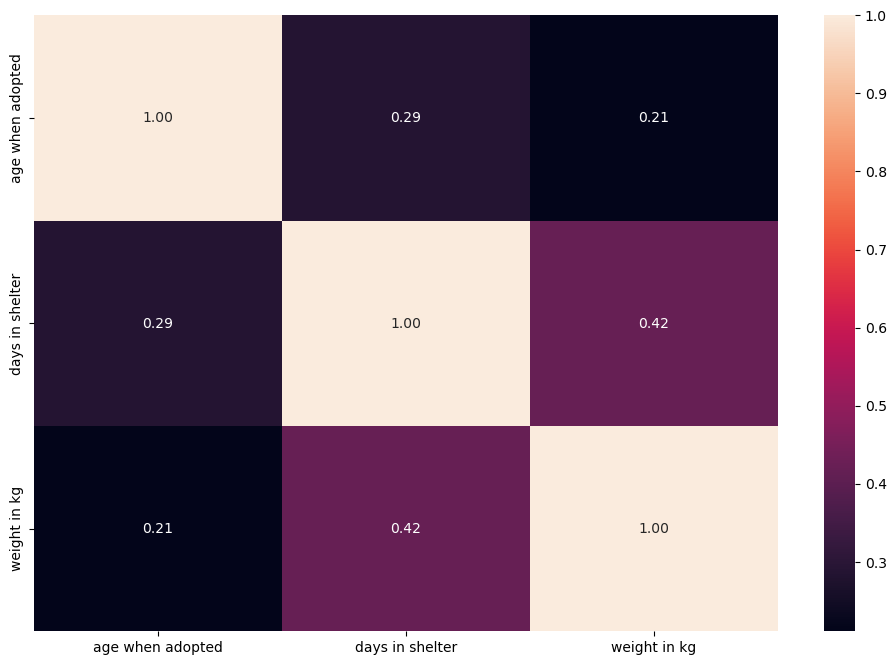

In [3686]:
# Let's create a heatmap to see what is the exact correlation between chosen variables
pp_df = df[['age when adopted','days in shelter', 'weight in kg']]
corr = pp_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [3687]:
# A moderate correlation is visible between 'days in shelter' and 'weight in kg' (0.42). 
# On the other hand, we can observe a weak correlation between 'days in shelter' and '"age when adopted" (0.29).
# We will laser in on these correlation later on in the regression analysis. 

## Adoption trends

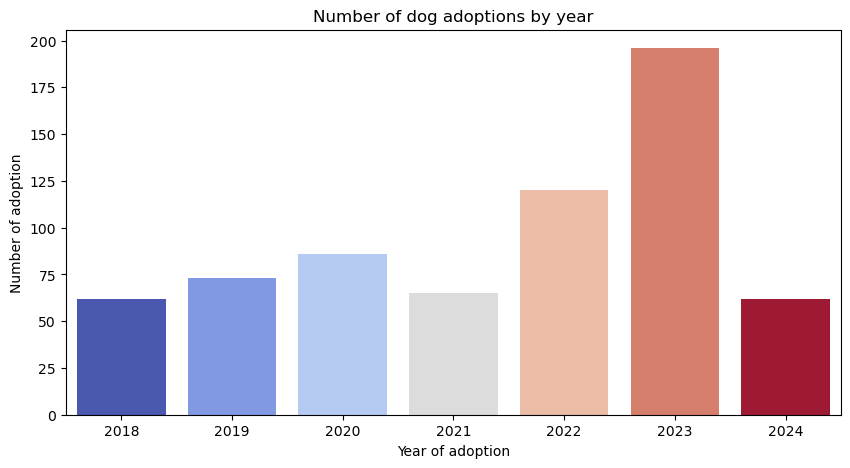

In [3689]:
# Number of adoptions in the period of 2018-2024 (excluding 2025 since it's the current year so the number of adoptions will be small obviously)
df['adoption year'] = df['adoption date'].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['adoption year'] < 2025], x='adoption year', palette='coolwarm', hue='adoption year', legend = False)
plt.title('Number of dog adoptions by year')
plt.xlabel('Year of adoption')
plt.ylabel('Number of adoption')
plt.show()


In [3690]:
# 2023 is definitely the winner in the number of adoptions, almost 200! 

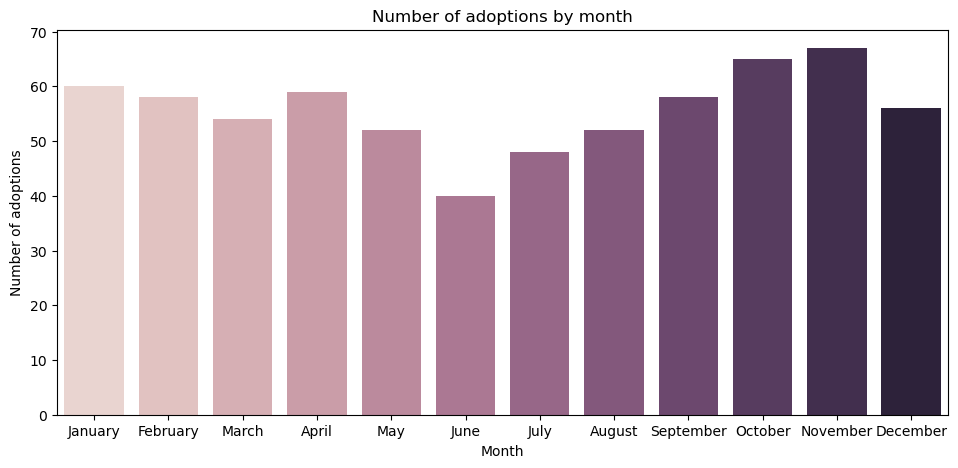

In [3691]:
# Seasonality of adoptions - number of adoptions by month
df['adoption month'] = df['adoption date'].dt.month
plt.figure(figsize=(11.5, 5))
sns.countplot(data=df, x='adoption month', hue='adoption month', legend=False)
plt.title('Number of adoptions by month')
plt.xlabel('Month')
plt.ylabel('Number of adoptions')
plt.xticks(range(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [3692]:
# There is a noticeable drop in adoptions during the summer holiday season. Since many people travel during this time, they may hesitate 
# to adopt a dog only to leave shortly after. As a result, the decision to adopt is likely postponed to the following months.

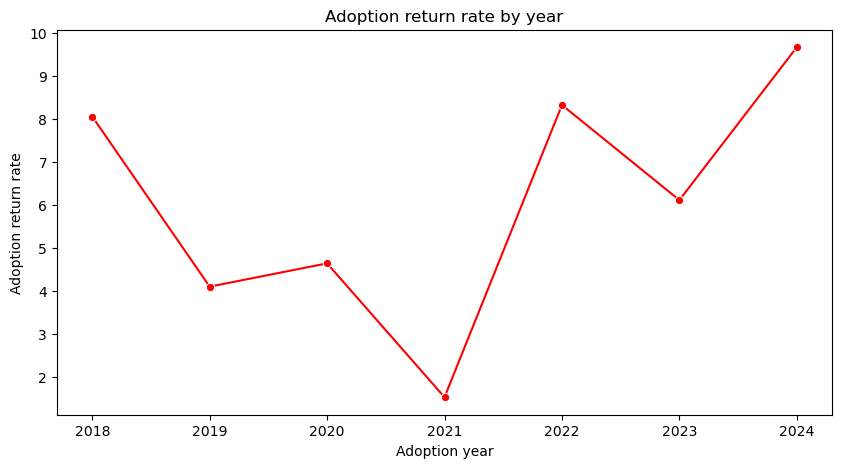

In [3696]:
# Counting returns percentage (icncludes only dogs adopted and returned in the same year); excluding 2025
returns_per_year = (
    df.groupby('adoption year', observed=True)['returned']
    .agg(lambda x: x.sum() / len(x) * 100)
)

returns_per_year_filtered = returns_per_year[returns_per_year.index < 2025]

plt.figure(figsize=(10, 5))
sns.lineplot(x=returns_per_year_filtered.index, y=returns_per_year_filtered.values, marker='o', color='red')
plt.title('Adoption return rate by year')
plt.xlabel('Adoption year')
plt.ylabel('Adoption return rate')
plt.show()

In [3697]:
# Although 2023 is the year in which the most dog got adopted, the return rate is not the highest. The highest adoption return rate
# can be observed in 2024 (almost 10%), the lowest in 2021. 

# Distribution of days spent in the shelter

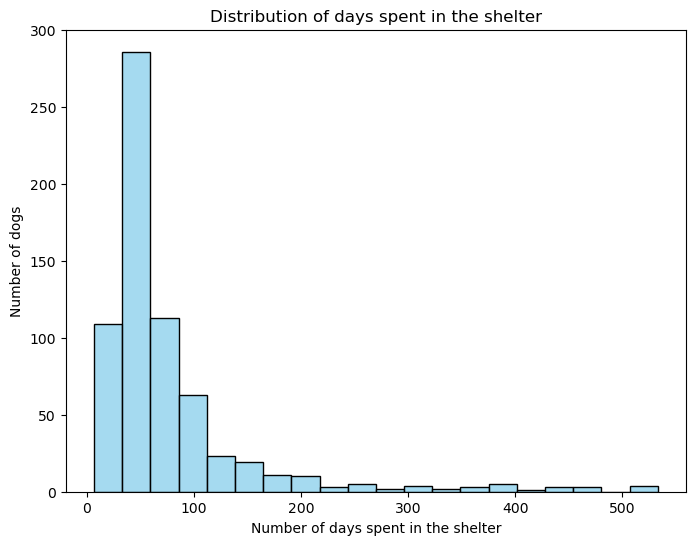

In [3716]:
#  Let's create a histogram to see the distribution of days spent in the shelter
plt.figure(figsize=(8, 6))
sns.histplot(df['days in shelter'], bins=20, color='skyblue')
plt.xlabel('Number of days spent in the shelter')
plt.ylabel('Number of dogs')
plt.title('Distribution of days spent in the shelter')
plt.show()

In [3717]:
# A right-skewed distribution can be observed - most of the dogs spent up to 100 days in the shelter before being adopted. 
# There are few long-term stays – there is a small number of cases where dogs stay in the shelter for several hundred days.

## Weight analysis

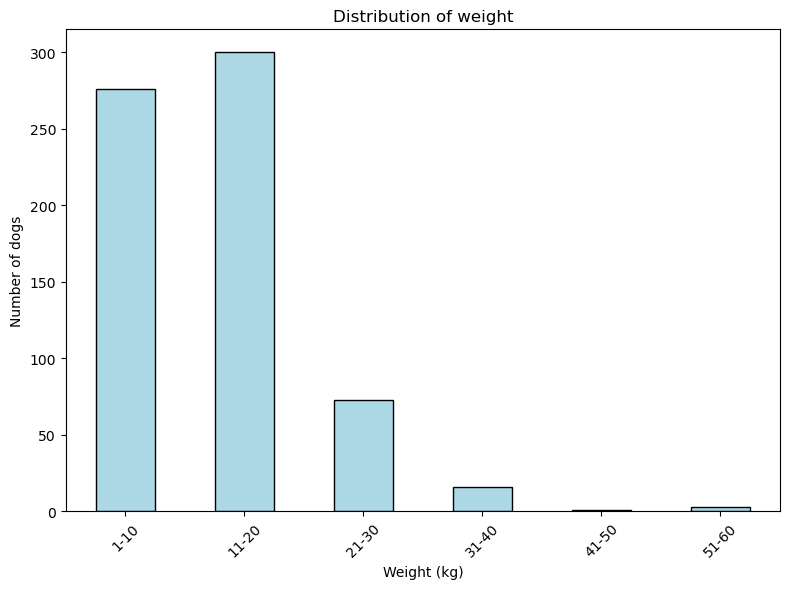

In [3719]:
# Let's create a histogram to see the distribution of weight in kg (in intervals of 10kg).
weight_bins = [1, 10, 20, 30, 40, 50, 60] 
weight_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60']
adopted_count = pd.cut(df['weight in kg'], bins=weight_bins, labels=weight_labels, right=True).value_counts().sort_index()
plt.figure(figsize=(8, 6))
adopted_count.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of dogs')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [3720]:
# Most of the adopted dogs are in the lower weight ranges (1-10kg and 11-20kg) so rather small and medium-sized ones. The number of dogs in other
# weight categories drops significantly. 

In [3725]:
# Let's divide the dogs into weight groups and count the mean of days spent in the shelter based on the weight group
df['weight_group'] = pd.cut(df['weight in kg'], bins=weight_bins, labels=weight_labels)

weight_group_stats = df.groupby('weight_group', observed=True)['days in shelter'].mean().round()
weight_group_stats

weight_group
1-10      49.0
11-20     89.0
21-30    119.0
31-40    155.0
41-50    379.0
51-60    276.0
Name: days in shelter, dtype: float64

In [3726]:
# There seems to be a trend - bigger dogs wait longer for adoption. However, before making such assumptions, let's check the number of dogs in
# each category
df['weight_group'].value_counts().sort_index()

weight_group
1-10     276
11-20    300
21-30     73
31-40     16
41-50      1
51-60      3
Name: count, dtype: int64

In [3729]:
# Indeed, there are only 4 dogs which weight more than 40kg. Average days spent in the shelter for these weight groups may not be representative. 

In [3731]:
df = df.drop('weight_group', axis=1)

# Age

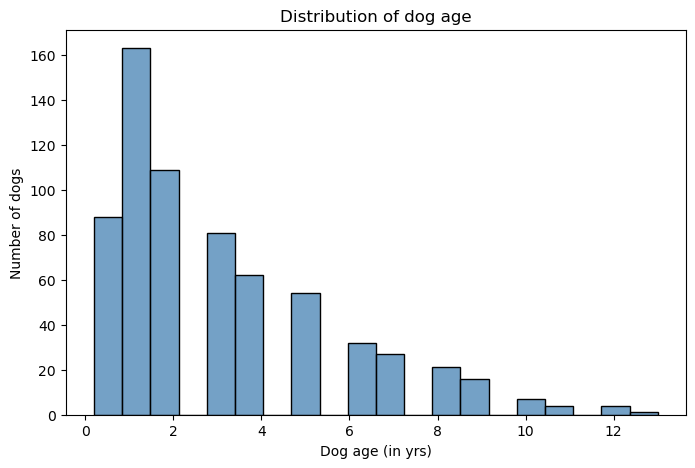

In [3734]:
# Distribution of dog age
plt.figure(figsize=(8, 5))
sns.histplot(df['age when adopted'], bins=20, color='steelblue')
plt.title('Distribution of dog age')
plt.xlabel('Dog age (in yrs)')
plt.ylabel('Number of dogs')
plt.show()

In [3735]:
# Most of the dogs in our dataset are rather young - less than 2 years old. There are only a dozen or so senior dogs.

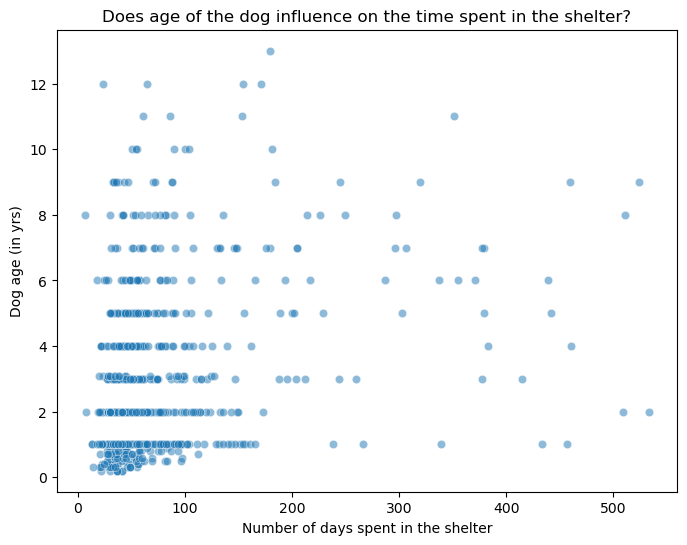

In [3738]:
# Do older dogs wait longer for adoption?
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['days in shelter'], y=df['age when adopted'], alpha=0.5)
plt.xlabel('Number of days spent in the shelter')
plt.ylabel('Dog age (in yrs)')
plt.title('Does age of the dog influence on the time spent in the shelter?')
plt.show()

In [3751]:
# There is no clear linear relationship – the points are widely scattered, meaning there is no obvious trend showing that older or younger dogs 
# consistently spend more or less time in the shelter. There might be a slight trend of older dogs staying longer – while younger dogs are found 
# across all time ranges, older dogs seem more dispersed, including those with extended shelter stays. 

# Gender

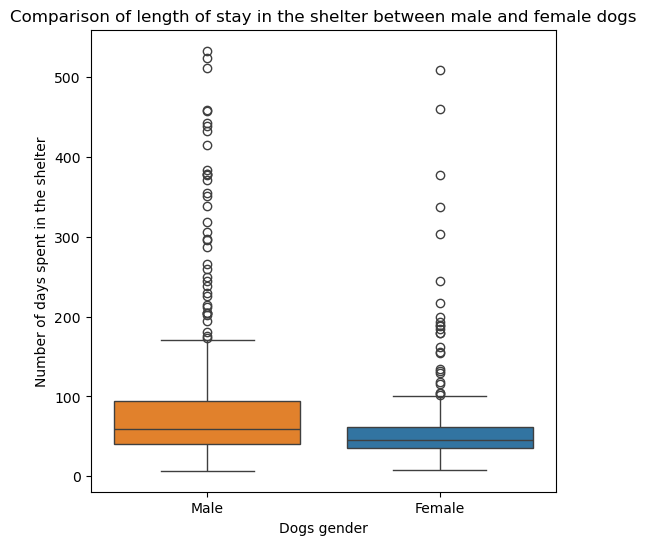

In [3754]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['male'].map({0: 'Female', 1: 'Male'}), 
            y=df['days in shelter'], hue=df['male'], legend=False)
plt.xlabel('Dogs gender')
plt.ylabel('Number of days spent in the shelter')
plt.title('Comparison of length of stay in the shelter between male and female dogs')
plt.show()

In [3756]:
# average days in the shelter for both genders
print(df.groupby('male')['days in shelter'].mean())


male
0    62.572016
1    87.502347
Name: days in shelter, dtype: float64


In [3758]:
df['male'].value_counts().sort_index()

male
0    243
1    426
Name: count, dtype: int64

In [3760]:
# It seems that male dogs wait longer for adoption than female dogs, the difference is about 25 days. However, there are more than two times more
# male dogs in the dataset, so let's check if the difference between groups is significant.
male_dogs = df[df['male'] == 1]['days in shelter']
female_dogs = df[df['male'] == 0]['days in shelter']

# t-student test
t_stat, p_value = ttest_ind(male_dogs, female_dogs, equal_var=False) 

# Result
print(f"T-stat: {t_stat:.2f}, p-value: {p_value:.4f}")

T-stat: 4.34, p-value: 0.0000


In [3762]:
# p-value is less than 0.05 meaning that the difference is statistically significant and male dogs wait longer for adoption.

# Breed

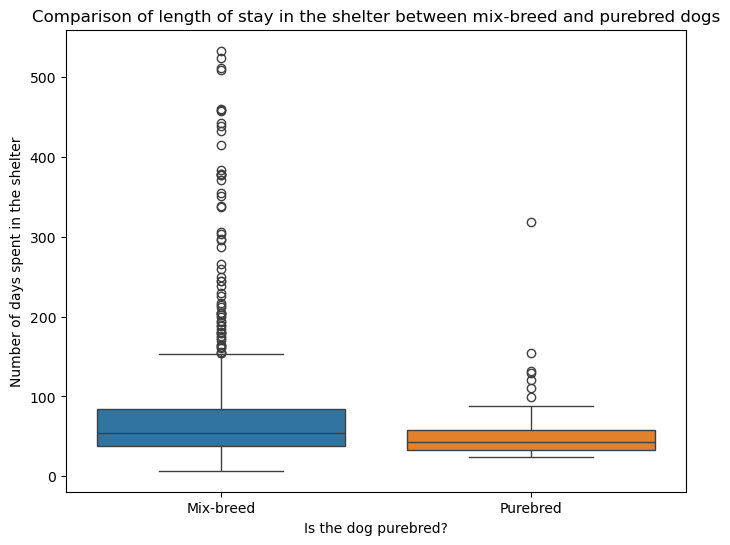

In [3765]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['purebred'], y=df['days in shelter'], hue=df['purebred'], legend = False)
plt.xlabel('Is the dog purebred?')
plt.ylabel('Number of days spent in the shelter')
plt.title('Comparison of length of stay in the shelter between mix-breed and purebred dogs')
plt.xticks([0, 1], ['Mix-breed', 'Purebred'])
plt.show()

In [3766]:
purebred_stats = df.groupby('purebred')['days in shelter'].mean()
print(purebred_stats)

purebred
0    80.510673
1    57.500000
Name: days in shelter, dtype: float64


In [3769]:
df['purebred'].value_counts().sort_index()

purebred
0    609
1     60
Name: count, dtype: int64

In [3771]:
# It seems that mix-breed dogs wait longer for adoption than purebred ones, the difference is about 23 days. Though, the number of dogs in each category
# differs a lot. Let's check if the difference between these groups is significant.

In [3773]:
purebred_dogs = df[df['purebred'] == 1]['days in shelter']
mix_dogs = df[df['purebred'] == 0]['days in shelter']

t_stat, p_value = ttest_ind(purebred_dogs, mix_dogs, equal_var=False)
print(f'T-stat: {t_stat:.2f}, p-value: {p_value:.4f}')


T-stat: -3.44, p-value: 0.0008


In [3775]:
# p-value < 0.05 indicates that the difference is actually statistically significant, meaning that mix-breed dogs wait longer for adoption. 

 # Linear regression - age, weight

In [3778]:
# Preparing the data
X = df[['age when adopted', 'weight in kg']]  # Independent variables
X = sm.add_constant(X)  # Adding and intercept
y = df['days in shelter']  # Dependent variable

# Linear regression model
model = sm.OLS(y, X).fit()

# Model results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        days in shelter   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     92.70
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.04e-36
Time:                        12:12:39   Log-Likelihood:                -3786.2
No. Observations:                 669   AIC:                             7578.
Df Residuals:                     666   BIC:                             7592.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9136      6.170  

R-squared = 0.21 means that the model explains 21% of variation in the number of days spent in the shelter. This is not much. 
The other 79% results from other factors that are not included in the model.
Value of Prob(F-statistic) is less then 0.01 meaning that one of the predictors has a significant effect on the dependent variable.
Each additional year of a dog’s age means an increase of almost 6 days spent in a shelter.
Each additional kilogram of a dog’s weight means an increase of almost 4 days spent in a shelter.

In [3781]:
# Let's visualize our model.

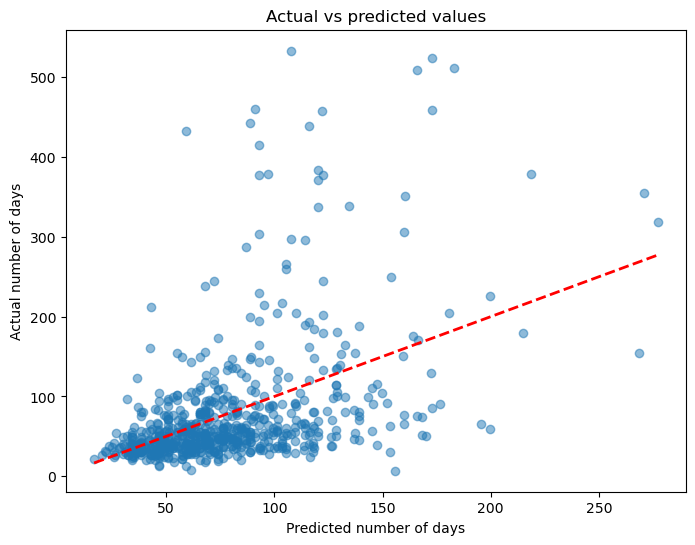

In [3783]:
# Counting predicted values
df['predicted_days'] = model.predict(X)

# Plot: Actual vs predicted data
plt.figure(figsize=(8,6))
plt.scatter(df['predicted_days'], df['days in shelter'], alpha=0.5)
plt.plot([df['predicted_days'].min(), df['predicted_days'].max()], 
         [df['predicted_days'].min(), df['predicted_days'].max()], 'r--', lw=2)
plt.xlabel('Predicted number of days')
plt.ylabel('Actual number of days')
plt.title('Actual vs predicted values')
plt.show()

In [3785]:
df = df.drop('predicted_days', axis=1)

# Linear Regression with other variables

In [3788]:
y = df['days in shelter']

# Matrix of independent variables – removing some of the variables, including the dependent one
X = df.drop(['days in shelter', 'name', 'arrival date', 'adoption date', 'returned', 'date of return', 
             'adoption year', 'adoption month'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        days in shelter   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     46.01
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           7.95e-41
Time:                        12:12:41   Log-Likelihood:                -3768.8
No. Observations:                 669   AIC:                             7550.
Df Residuals:                     663   BIC:                             7577.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.4955      7.018  

R-squared equals 0.259, meaning that the model explains only 25.9% of the variance in the number of days spent in the shelter. This suggests that the independent variables included in the model do not capture all the factors affecting shelter duration.
Prob (F-Statistic) = 3.79e-40 suggests that the overall regression model is statistically significant, meaning at least one of the predictors contributes to explaining the variation in days spent in the shelter.
The P>|t| value for each of the variable is higher than 0.05 meaning that none on the individual predictors are significant.
The results of Jarque-Bera test, value of skewness and kurtosis suggest that the data is not normally distributed and has high skewness, meaning the
model may not be the best fit.